In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)

In [3]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
for train_index, test_index in sss.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

sss = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
for train_index, val_index in sss.split(X_train,y_train):
  X_train, X_val = X_train[train_index], X_train[val_index]
  y_train, y_val = y_train[train_index], y_train[val_index]

print("Test size shape: ", X_test.shape)
print("Train size shape: ", X_train.shape)
print("Val size shape: ", X_val.shape)


Test size shape:  (40, 4096)
Train size shape:  (280, 4096)
Val size shape:  (80, 4096)


## Generating new samples

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(0.99)
X_pca = X_train.copy()
X_pca = pca.fit_transform(X_pca)
clf = GaussianMixture(n_components=40, random_state=42)
clf.fit(X_pca,y_train)

new_imgs = 30
X_new, y_new = clf.sample(new_imgs)
X_new = pca.inverse_transform(X_new)

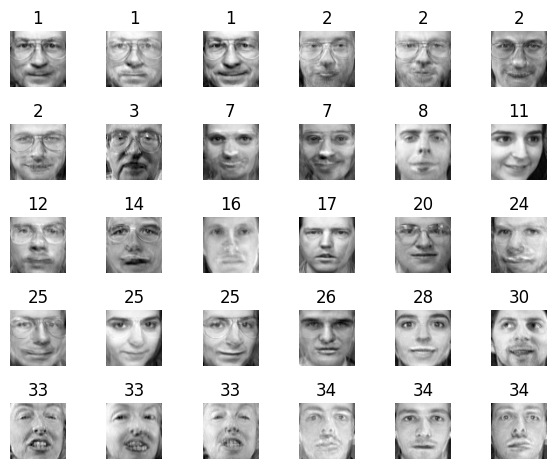

In [5]:
for i, img in enumerate(X_new):
  plt.subplot(5,6,i+1)
  plt.axis('off')
  plt.title(y_new[i])
  plt.imshow(img.reshape(64,64), cmap='gray')
  plt.tight_layout()
plt.show()


In [7]:
X_copy = pca.inverse_transform(X_pca)

In [9]:
n_rotated = 4
rotated = np.transpose(X_copy[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_copy[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_copy[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])



In [10]:
# artifical samples
X_new_pca = pca.transform(X_bad_faces)

clf.score_samples(X_new_pca)

array([-4.59900994e+07, -3.17140553e+07, -3.02803785e+07, -4.71646508e+07,
       -3.14575404e+07, -5.29701762e+07, -4.89796344e+07, -1.16021366e+08,
       -9.50942943e+07, -9.19449553e+07])

In [12]:
# og samples
clf.score_samples(X_pca[:10])

array([1123.83861465, 1126.4459246 , 1126.44592303, 1176.66453373,
       1139.60074654, 1146.18455695, 1007.56476929, 1118.90303306,
       1131.05139328, 1160.15653866])

## PCA Reconstruction comparison

In [15]:
X_train.shape

(280, 4096)

In [27]:
from numpy import linalg as LA
errors_og = []
errors_new = []
pca = PCA(0.99)

img_pca = pca.fit_transform(X_train)
img_reconstructed = pca.inverse_transform(img_pca)
for og, rec in zip(X_train,img_reconstructed):
  errors_og.append(LA.norm(og-rec, None))
print("Error OG Size: ", len(errors_og))
bad_pca = pca.transform(X_bad_faces)
bad_reconstructed = pca.inverse_transform(bad_pca)
for bad, rec in zip(X_bad_faces,bad_reconstructed):
  errors_new.append(LA.norm(bad-rec, None))

print("Error Bad Size: ", len(errors_new))


Error OG Size:  280
Error Bad Size:  10


<Axes: ylabel='Count'>

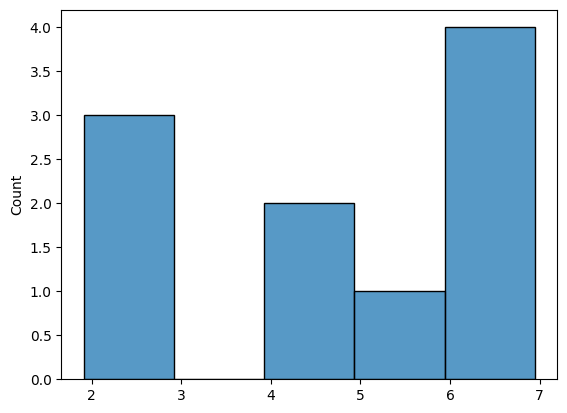

In [36]:
import seaborn as sns
sns.histplot(errors_new)


<Axes: ylabel='Count'>

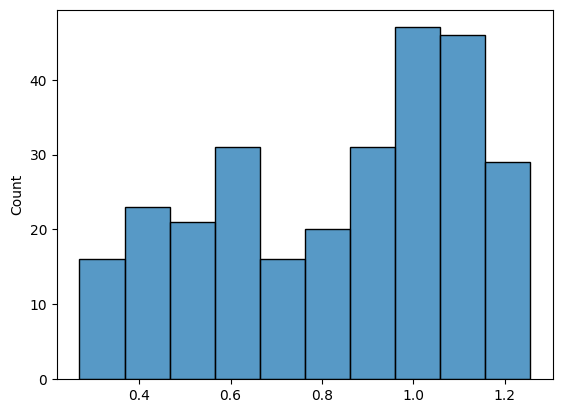

In [37]:
sns.histplot(errors_og)


In [45]:
len(bad_reconstructed -1 )//2

5

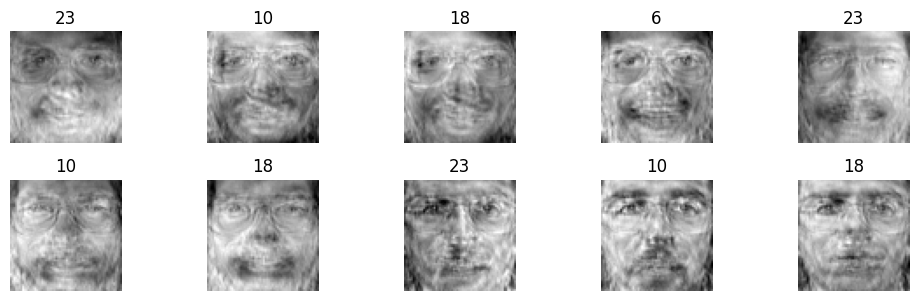

In [49]:
plt.figure(figsize=(10,15))
for i,bad in enumerate(bad_reconstructed):
  plt.subplot(len(bad_reconstructed)-1//2, len(bad_reconstructed)//2, i +1 )
  plt.axis('off')
  plt.title(y_bad[i])
  plt.imshow(bad.reshape(64,64), cmap='gray')
  plt.tight_layout()
plt.show()

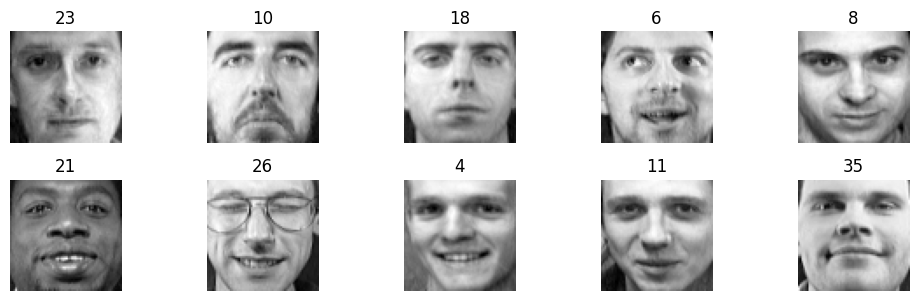

In [56]:
plt.figure(figsize=(10,15))
for i,og in enumerate(img_reconstructed[:10]):
  plt.subplot(len(img_reconstructed[:10]) - 1 //2, len(img_reconstructed[:10])//2, i +1 )
  plt.axis('off')
  plt.title(y_train[i])
  plt.imshow(og.reshape(64,64), cmap='gray')
  plt.tight_layout()
plt.show()